In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from numpy import expand_dims

In [42]:
# load the model
model = VGG16()
# take a look at the model structure
# model.summary()

In [29]:
len(model.layers)

23

In [48]:
# redefine model to output right after the first hidden layer
model = VGG16()
n = 3 # try to play with this number
model = Model(inputs=model.inputs, outputs=model.layers[n].output)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


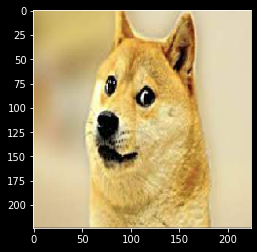

In [44]:
# load the image with the required shape
img = load_img('doge.jpg', target_size=(224, 224))
plt.imshow(img)

In [45]:
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'training sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
img.shape

(1, 224, 224, 3)

In [49]:
# get feature map for first hidden layer
feature_maps = model.predict(img)
feature_maps.shape  # 64 feature maps were produced from the 1st convolution operation

(1, 112, 112, 64)

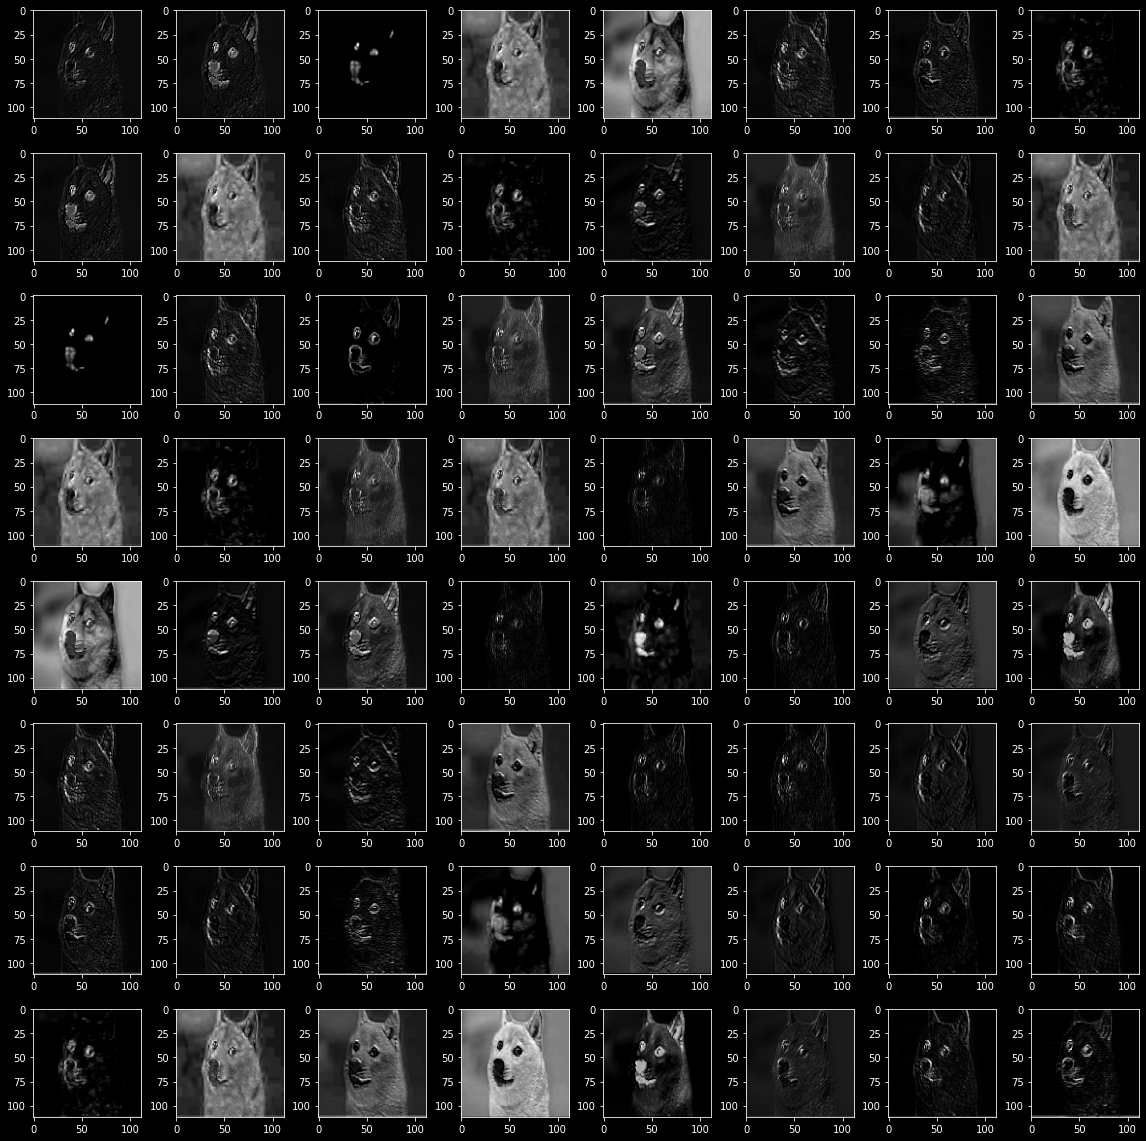

In [50]:
fig, ax = plt.subplots(8, 8, figsize=(16, 16))
for i in range(8):
    for j in range(8):
        ax[i, j].imshow(feature_maps[0, :, :, (i+1)*(j+1)-1], cmap='gray')
plt.tight_layout()